In [15]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [16]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('data-breast cancer.csv')



df.head()

#df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
#dropping unnecessary columns to help in selecting features
df.drop(df.columns[[0,4,7,8,9,10,11,12]], axis =1, inplace = True)
df.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'smoothness_mean', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [18]:
#encoding and selecting features
enc = OrdinalEncoder()


df[['diagnosis']] = enc.fit_transform(df[['diagnosis']])


selected_features = df[['radius_mean', 'texture_mean', 'radius_worst', 'texture_worst', 'compactness_worst', 'concave points_worst' ]]
display(selected_features)

,radius_mean,texture_mean,radius_worst,texture_worst,compactness_worst,concave points_worst
0,17.99,10.38,25.380,17.33,0.66560,0.2654
1,20.57,17.77,24.990,23.41,0.18660,0.1860
2,19.69,21.25,23.570,25.53,0.42450,0.2430
3,11.42,20.38,14.910,26.50,0.86630,0.2575
4,20.29,14.34,22.540,16.67,0.20500,0.1625
...,...,...,...,...,...,...
564,21.56,22.39,25.450,26.40,0.21130,0.2216
565,20.13,28.25,23.690,38.25,0.19220,0.1628
566,16.60,28.08,18.980,34.12,0.30940,0.1418
567,20.60,29.33,25.740,39.42,0.86810,0.2650


In [19]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [20]:
# defining y variable

y = df['diagnosis'].values

<Axes: >

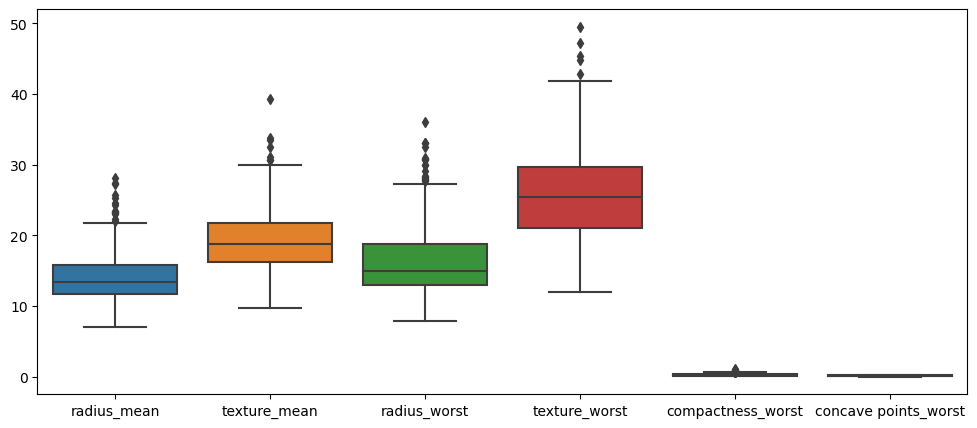

In [21]:
#visualization: box plots of selected features
plt.figure(figsize = (12,5))
sns.boxplot(data = selected_features)

C:\Users\ideod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

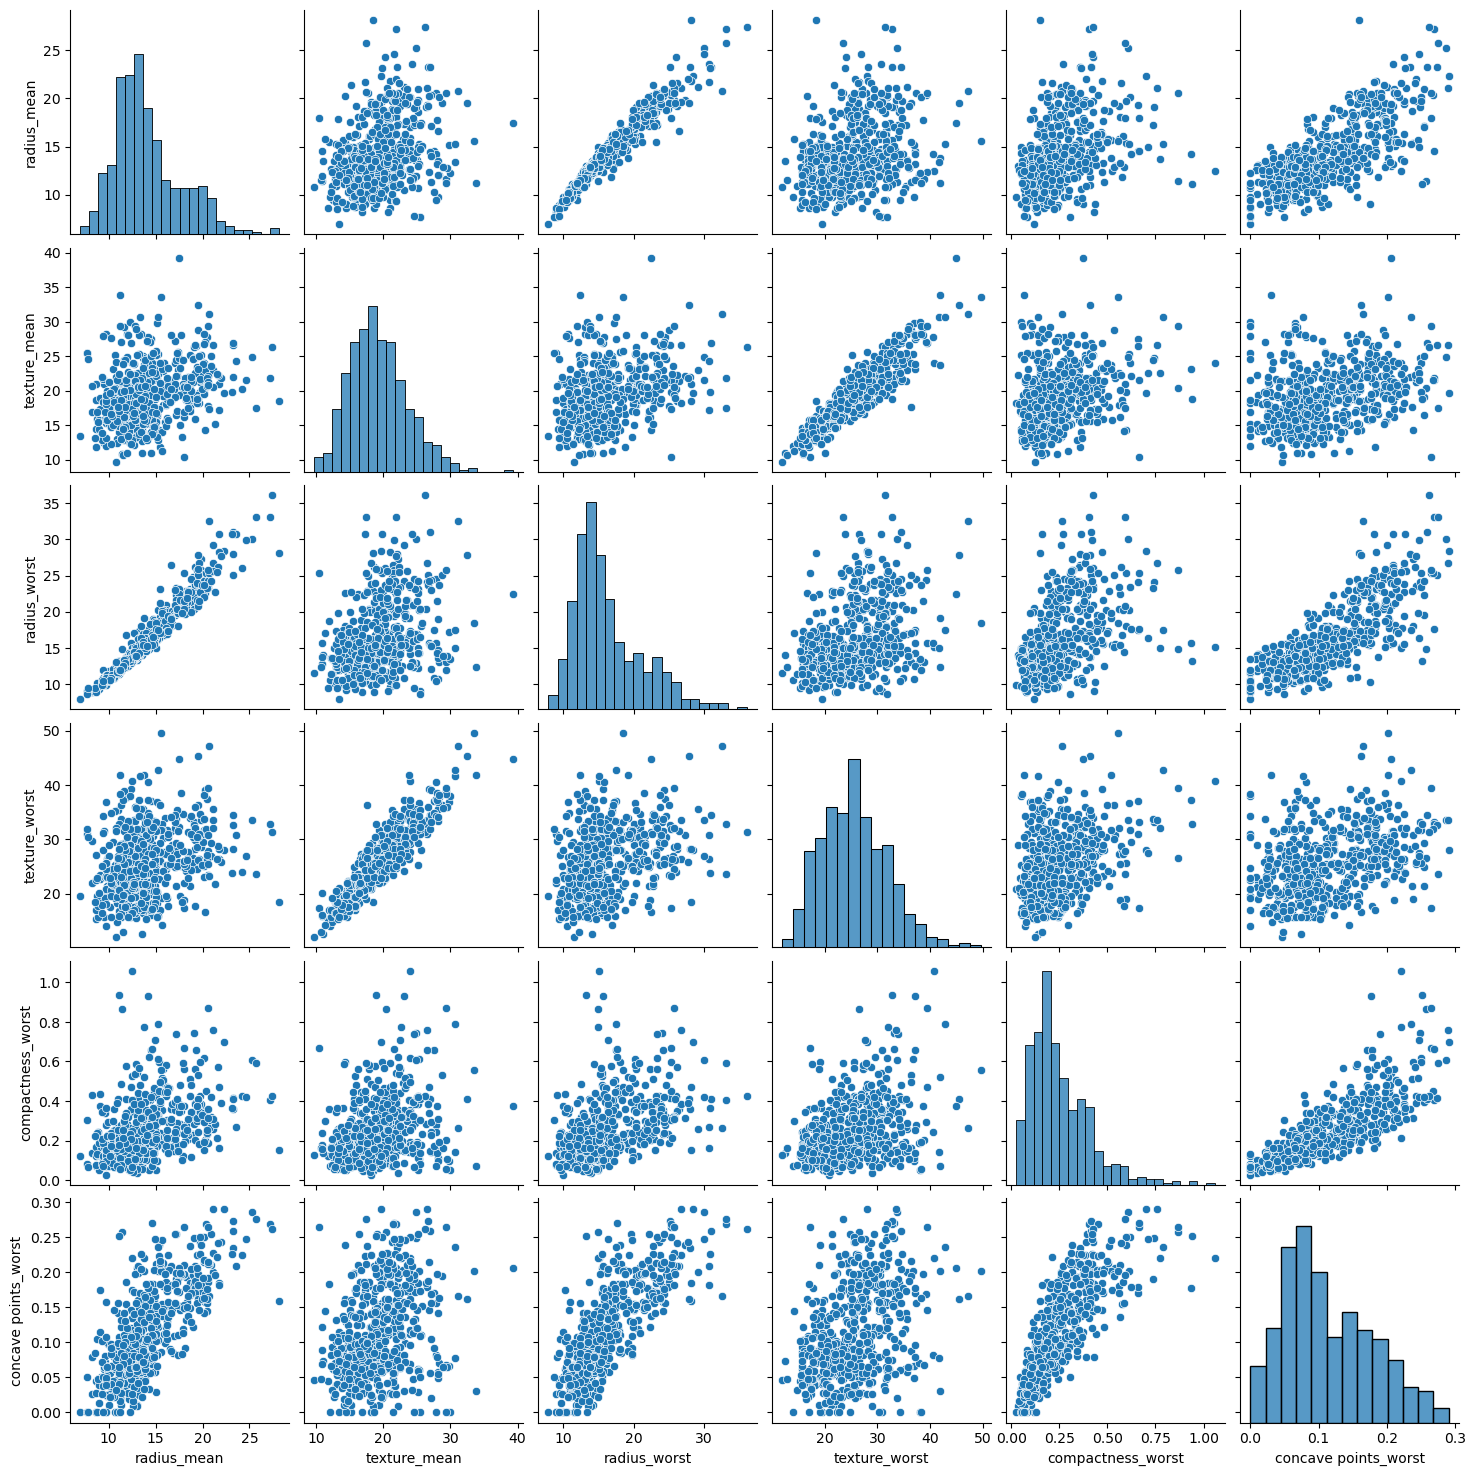

In [22]:
#visualization: pairplot
plt.figure(figsize = (12,5))
sns.pairplot(data = selected_features)

<Axes: >

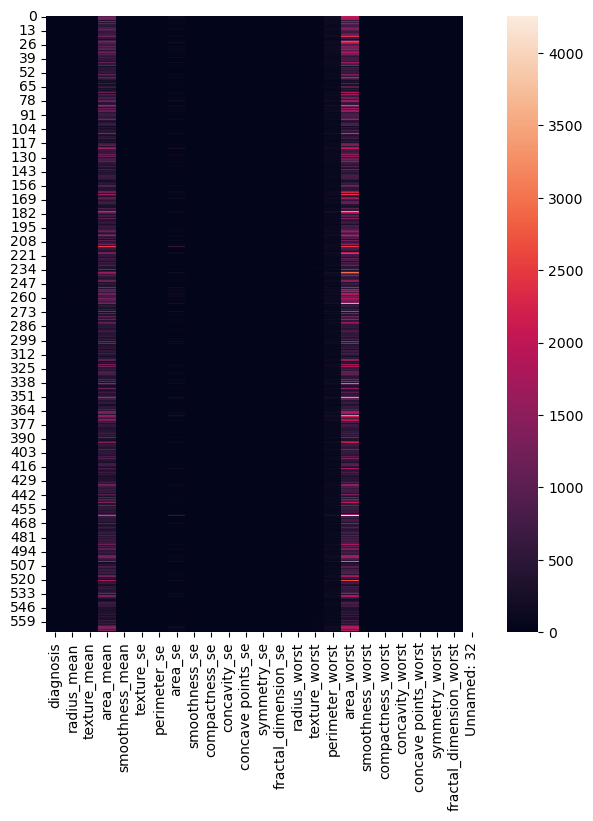

In [23]:
#visualization:  heatmap
plt.figure(figsize = (7,8))
sns.heatmap(df)


In [24]:
#sns.pairplot(df, hue = "diagnosis")

<Axes: ylabel='count'>

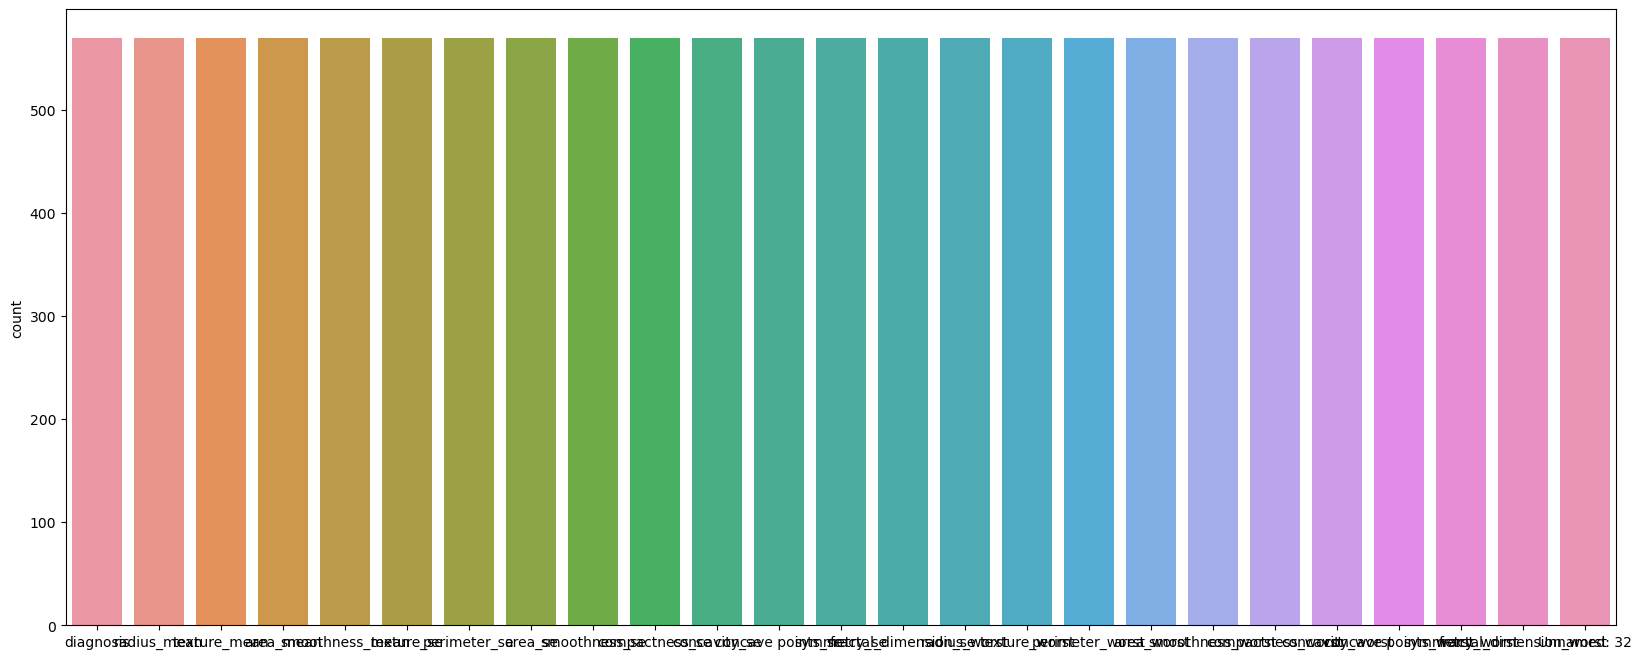

In [25]:

plt.figure(figsize =(20,8))
sns.countplot(df)

<Axes: >

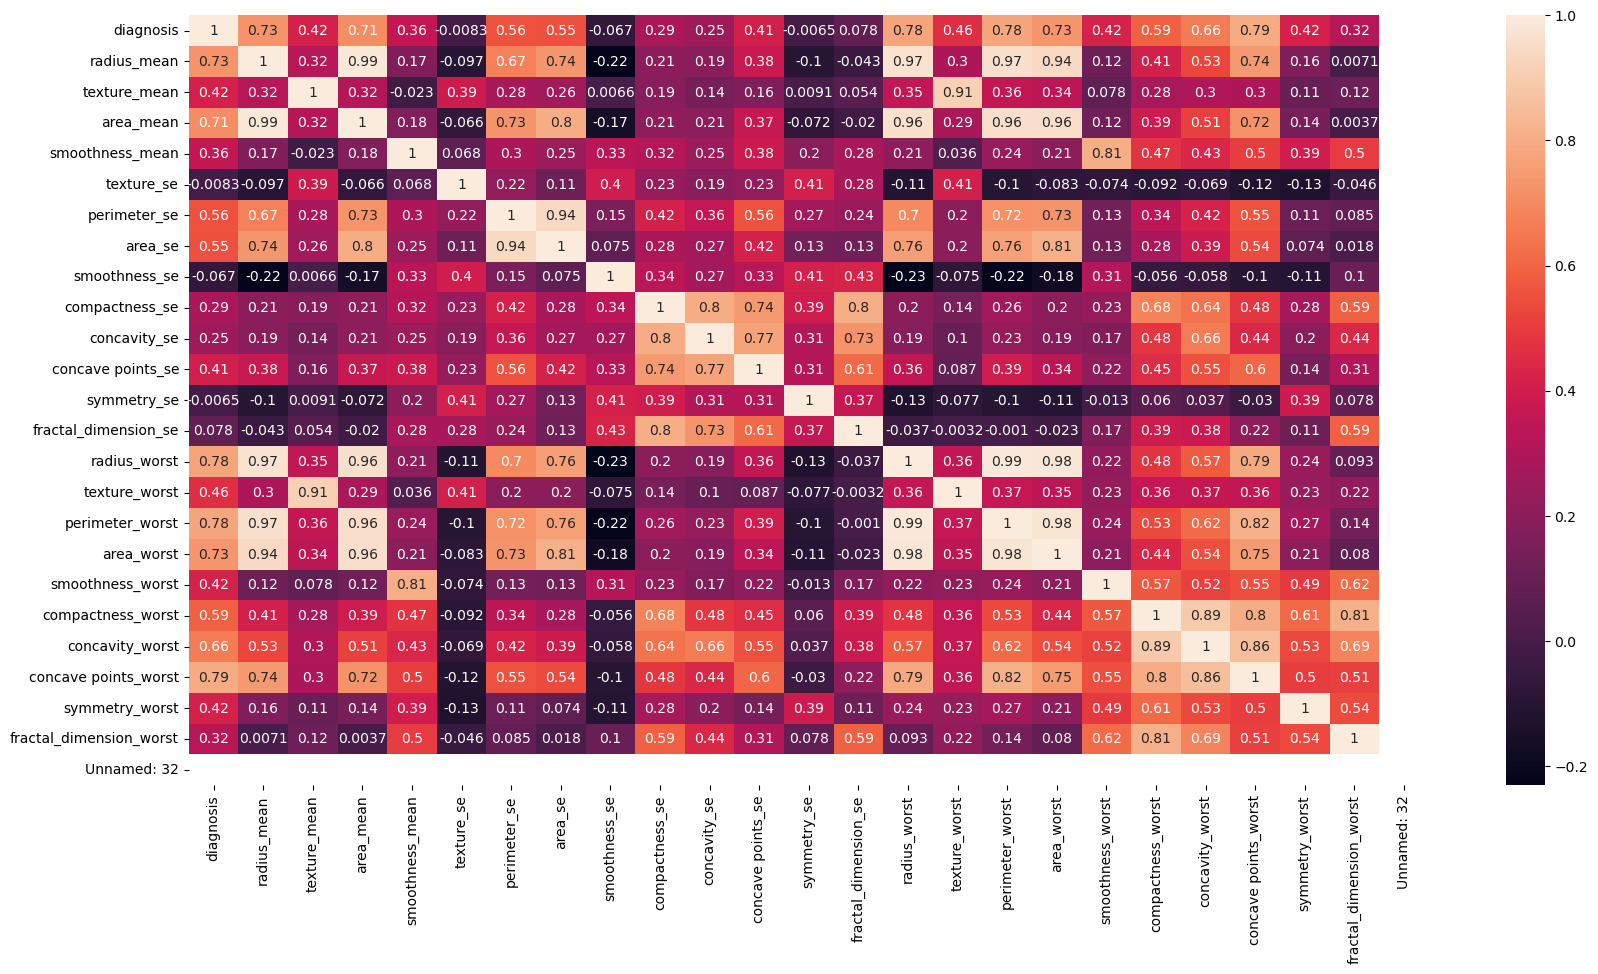

In [26]:
#visualization: correlation heatmap
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot = True)

<Axes: >

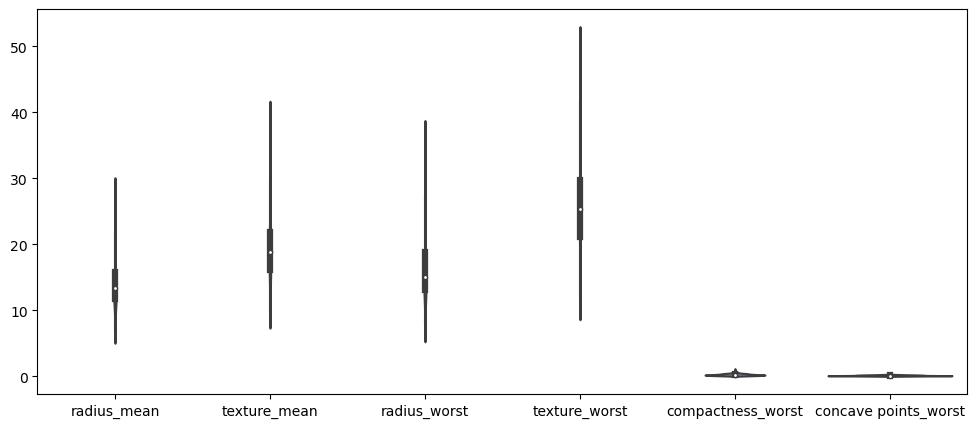

In [27]:
#visualization: violin plots
plt.figure(figsize = (12,5))
sns.violinplot(data= selected_features)